<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
import sqlite3
import pandas as pd

In [4]:
!wget --no-check-certificate https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-05-16 10:58:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite'

     0K .......... .......... .......... .......... ..........  0%  617K 58s
    50K .......... .......... .......... .......... ..........  0%  370K 77s
   100K .......... .......... .......... .......... ..........  0%  479K 76s
   150K .......... .......... .......... .......... ..........  0%  474K 76s
   200K .......... .......... .......... .......... .

Connect to the database.


In [2]:
#second database connection with sqlite
conn_sqlite = sqlite3.connect("m4_survey_data.sqlite.1") # open a database connection

QUERY = """SELECT * FROM master"""

df_sqlite=pd.read_sql_query(QUERY,conn_sqlite)

df_sqlite.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [3]:
QUERY = "SELECT * FROM master"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_master = pd.read_sql_query(QUERY,conn_sqlite)
print(df_master.head())

   index  Respondent                      MainBranch Hobbyist  \
0      0           4  I am a developer by profession       No   
1      1           9  I am a developer by profession      Yes   
2      2          13  I am a developer by profession      Yes   
3      3          16  I am a developer by profession      Yes   
4      4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality tha

Import pandas module.


## Demo: How to run an sql query


In [10]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn_sqlite)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [11]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn_sqlite)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [12]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn_sqlite)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [13]:
# print all the tables names in the database
QUERY = """
SELECT * FROM
master"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn_sqlite)
df.describe()

,index,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000
mean,5698.500000,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.779318
std,3290.463519,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393680
min,0.000000,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,2849.250000,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000
50%,5698.500000,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,8547.750000,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000
max,11397.000000,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [15]:
# print all the tables names in the database
QUERY = """
SELECT * FROM
sqlite_master"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn_sqlite)
df

,type,name,tbl_name,rootpage,sql
0,table,EduOther,EduOther,2,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,table,DevType,DevType,741,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,table,LastInt,LastInt,1024,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,table,JobFactors,JobFactors,1355,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,table,WorkPlan,WorkPlan,1808,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."
5,table,WorkChallenge,WorkChallenge,2088,"CREATE TABLE ""WorkChallenge"" (\n""Respondent"" I..."
6,table,LanguageWorkedWith,LanguageWorkedWith,2378,"CREATE TABLE ""LanguageWorkedWith"" (\n""Responde..."
7,table,LanguageDesireNextYear,LanguageDesireNextYear,2638,"CREATE TABLE ""LanguageDesireNextYear"" (\n""Resp..."
8,table,DatabaseWorkedWith,DatabaseWorkedWith,2877,"CREATE TABLE ""DatabaseWorkedWith"" (\n""Responde..."
9,table,DatabaseDesireNextYear,DatabaseDesireNextYear,3028,"CREATE TABLE ""DatabaseDesireNextYear"" (\n""Resp..."


In [18]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn_sqlite)
print(df.iat[0,0])
df

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

,sql
0,"CREATE TABLE ""master"" (\n""index"" INTEGER,\n ""..."


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<Axes: ylabel='Frequency'>

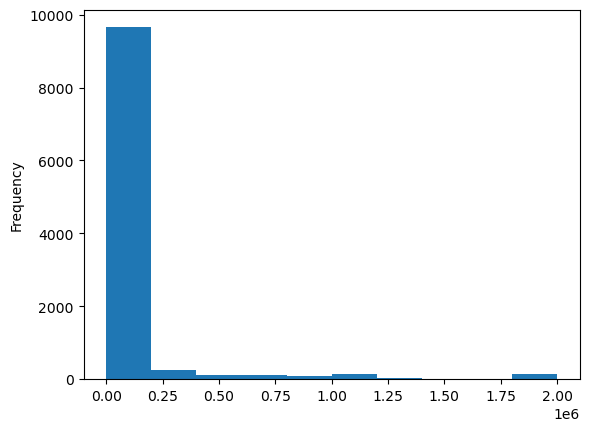

In [24]:
#df_master is the dataframe of table master
# your code goes here
df_master['ConvertedComp'].plot(kind='hist')

### Box Plots


Plot a box plot of `Age.`


[]

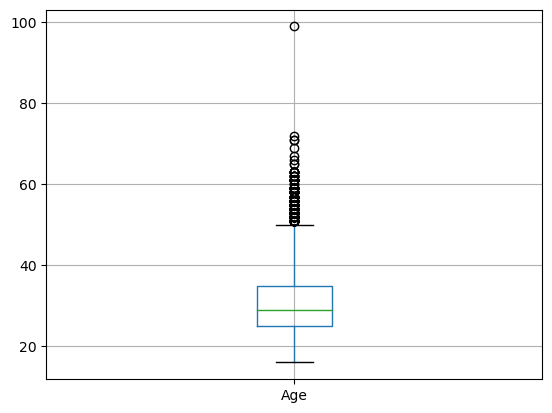

In [25]:
# your code goes here
b_plot = df_master.boxplot(column = ['Age']) 
b_plot.plot()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

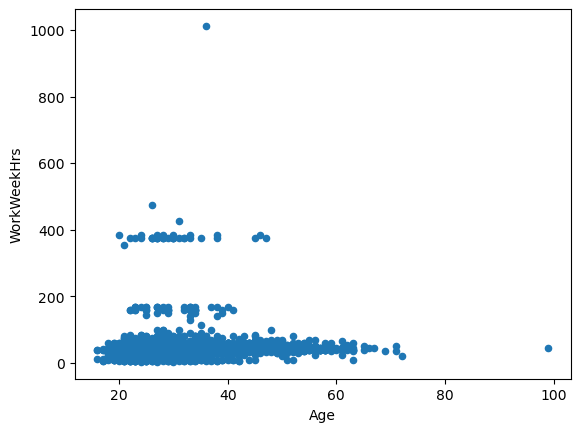

In [26]:
# your code goes here
df_master.plot.scatter(x='Age',y='WorkWeekHrs')                     

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [27]:
import matplotlib.pyplot as plt
import numpy as np

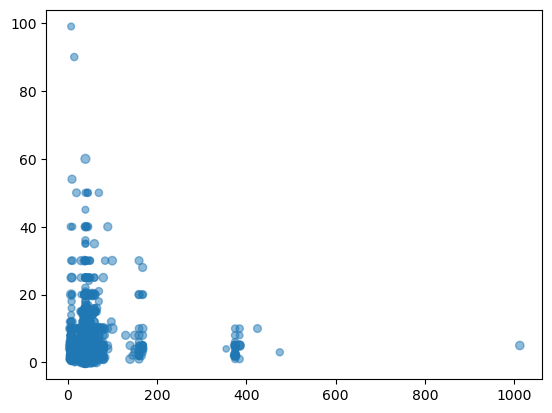

In [29]:
# your code goes here
QUERY = "SELECT WorkWeekHrs,CodeRevHrs,Age FROM master"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_bubble = pd.read_sql_query(QUERY,conn_sqlite)

plt.scatter(x='WorkWeekHrs', y='CodeRevHrs', s='Age', alpha=0.5, data=df_bubble)

## Visualizing composition of data


### Pie Charts


   dbms_count DatabaseDesireNextYear
0        4328             PostgreSQL
1        3649                MongoDB
2        3331                  Redis
3        3281                  MySQL
4        2856          Elasticsearch


<Axes: ylabel='dbms_count'>

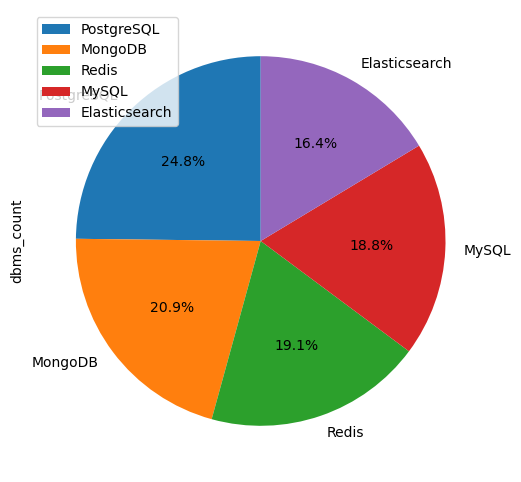

In [66]:
# your code goes here

# your code goes here
QUERY = "SELECT count(DatabaseDesireNextYear) as dbms_count,DatabaseDesireNextYear FROM DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(DatabaseDesireNextYear) desc limit 5"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_dbms = pd.read_sql_query(QUERY,conn_sqlite)

print(df_dbms)

df_dbms.plot(kind='pie',y='dbms_count',labels=df_dbms['DatabaseDesireNextYear'],figsize=(8, 6),autopct='%1.1f%%',startangle=90)

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [77]:
# importing numpy as np
import numpy as np

       Age  WorkWeekHrs  CodeRevHrs
0     31.0          8.0         3.0
1     34.0         40.0         2.0
2     32.0         40.0         2.0
3     34.0         42.0        15.0
4     33.0         40.0         2.0
...    ...          ...         ...
2937  32.0         42.0         4.0
2938  32.0         50.0         2.0
2939  32.0         56.0        14.0
2940  34.0         40.0         5.0
2941  30.0         80.0         1.0

[2942 rows x 3 columns]
      WorkWeekHrs  CodeRevHrs
Age                          
30.0         40.0         4.0
31.0         40.0         4.0
32.0         40.0         4.0
33.0         40.0         4.0
34.0         40.0         4.0
35.0         40.0         4.0


<Axes: xlabel='Age'>

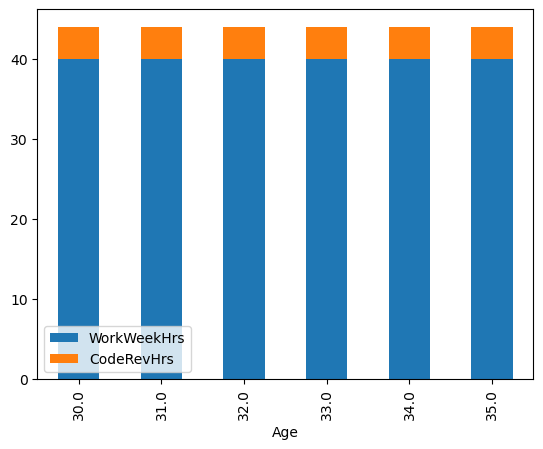

In [162]:
# your code goes here
QUERY = "SELECT Age,WorkWeekHrs,CodeRevHrs FROM master where Age between 30 and 35"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_stacked = pd.read_sql_query(QUERY,conn_sqlite)

print(df_stacked)

print(df_stacked.groupby('Age').aggregate(np.median))

df_stacked.groupby('Age').aggregate(np.median).plot.bar(stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


      Age  ConvertedComp
0    47.0       103000.0
1    54.0            NaN
2    47.0        54996.0
3    47.0        62807.0
4    45.0        72522.0
..    ...            ...
594  45.0        76339.0
595  46.0        68705.0
596  48.0       300000.0
597  50.0        87668.0
598  50.0        59652.0

[599 rows x 2 columns]


<Axes: xlabel='Age'>

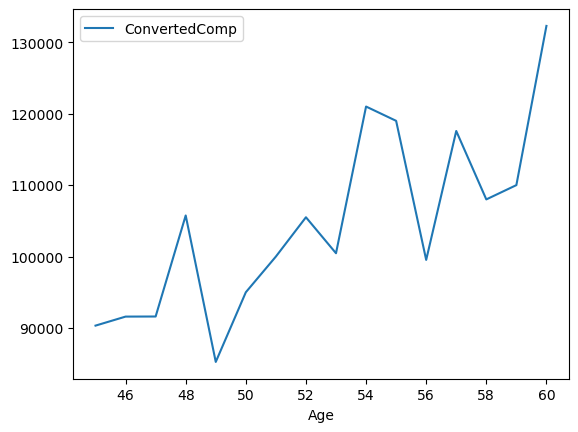

In [159]:
# your code goes here
QUERY = "SELECT Age,ConvertedComp FROM master where Age between 45 and 60"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_line = pd.read_sql_query(QUERY,conn_sqlite)

print(df_line)

df_line.groupby('Age').aggregate(np.median).plot.line()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


   Count                                         MainBranch
0  10618                     I am a developer by profession
1    780  I am not primarily a developer, but I write co...


<Axes: ylabel='MainBranch'>

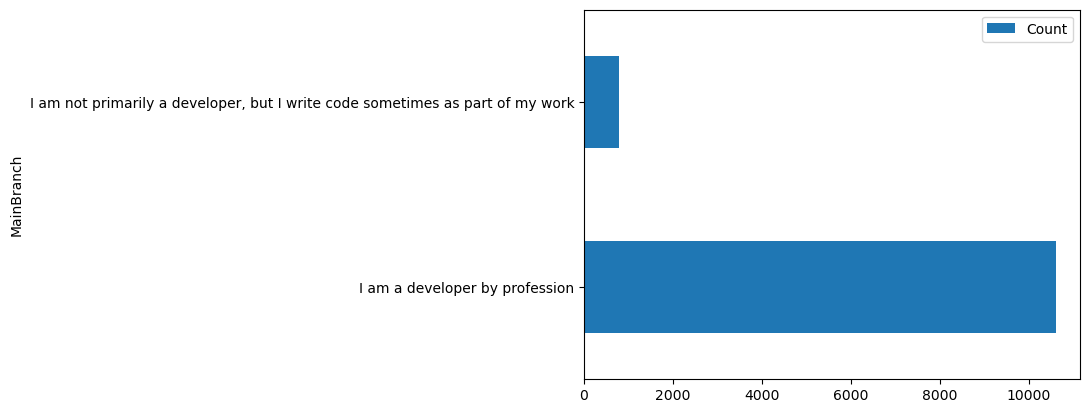

In [108]:
# your code goes here
QUERY = "SELECT count(MainBranch) as Count,MainBranch FROM master group by MainBranch"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_barh = pd.read_sql_query(QUERY,conn_sqlite)

print(df_barh)

df_barh.plot.barh(x='MainBranch',y='Count')

Close the database connection.


In [110]:
#Quiz

# your code goes here
QUERY = "SELECT count(Respondent) as res_count,LanguageDesireNextYear FROM LanguageDesireNextYear group by LanguageDesireNextYear order by res_count desc limit 20"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_lang = pd.read_sql_query(QUERY,conn_sqlite)

print(df_lang)




    res_count LanguageDesireNextYear
0        6630             JavaScript
1        5328               HTML/CSS
2        5239                 Python
3        5012                    SQL
4        4088             TypeScript
5        3591                     C#
6        3097  Bash/Shell/PowerShell
7        2953                   Java
8        2759                     Go
9        1890                 Kotlin
10       1633                    C++
11       1520                   Rust
12       1457                    PHP
13       1397            WebAssembly
14       1179                  Swift
15       1029                   Ruby
16       1028                      C
17        879                  Scala
18        850                      R
19        836              Other(s):


<Axes: xlabel='LanguageWorkedWith'>

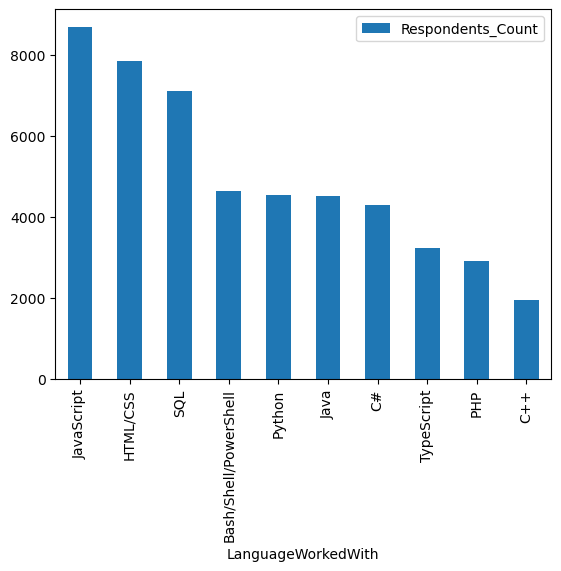

In [9]:
#For final presentation
# your code goes here
QUERY = "SELECT count(Respondent) as Respondents_Count,LanguageWorkedWith FROM LanguageWorkedWith group by LanguageWorkedWith order by Respondents_Count desc limit 10"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_top_10_lang = pd.read_sql_query(QUERY,conn_sqlite)

df_top_10_lang.plot.bar(y='Respondents_Count',x='LanguageWorkedWith')



<Axes: xlabel='LanguageDesireNextYear'>

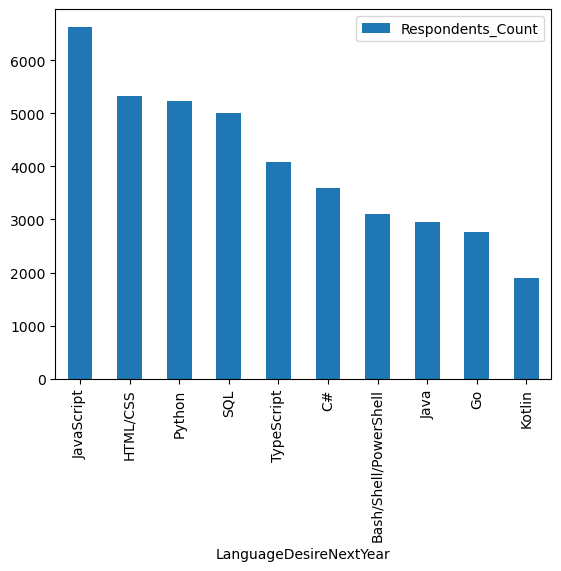

In [10]:
#For final presentation
# your code goes here
QUERY = "SELECT count(Respondent) as Respondents_Count,LanguageDesireNextYear FROM LanguageDesireNextYear group by LanguageDesireNextYear order by Respondents_Count desc limit 10"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_top_10_lang = pd.read_sql_query(QUERY,conn_sqlite)

df_top_10_lang.plot.bar(y='Respondents_Count',x='LanguageDesireNextYear')



<Axes: xlabel='DatabaseWorkedWith'>

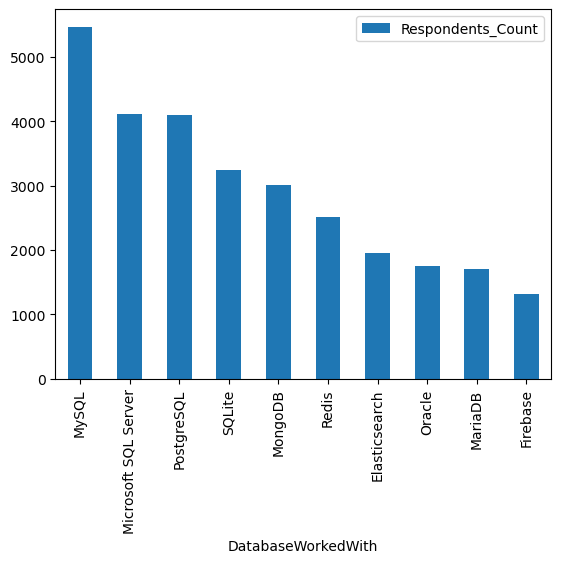

In [11]:
#For final presentation
# your code goes here
QUERY = "SELECT count(Respondent) as Respondents_Count,DatabaseWorkedWith FROM DatabaseWorkedWith group by DatabaseWorkedWith order by Respondents_Count desc limit 10"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_top_10_lang = pd.read_sql_query(QUERY,conn_sqlite)

df_top_10_lang.plot.bar(y='Respondents_Count',x='DatabaseWorkedWith')



<Axes: xlabel='DatabaseDesireNextYear'>

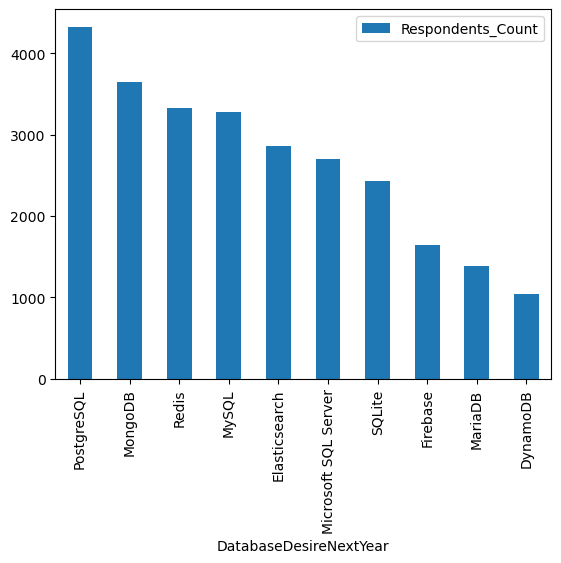

In [12]:
#For final presentation
# your code goes here
QUERY = "SELECT count(Respondent) as Respondents_Count,DatabaseDesireNextYear FROM DatabaseDesireNextYear group by DatabaseDesireNextYear order by Respondents_Count desc limit 10"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_top_10_lang = pd.read_sql_query(QUERY,conn_sqlite)

df_top_10_lang.plot.bar(y='Respondents_Count',x='DatabaseDesireNextYear')



In [121]:
#Quiz

# your code goes here
QUERY = "SELECT count(Respondent) as res_count,LanguageWorkedWith FROM LanguageWorkedWith where LanguageWorkedWith='SQL'"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_work = pd.read_sql_query(QUERY,conn_sqlite)
df_work


,res_count,LanguageWorkedWith
0,7106,SQL


In [154]:


#Quiz

# your code goes here
QUERY = "SELECT * FROM DatabaseWorkedWith where DatabaseWorkedWith='MySQL' and Respondent NOT IN (select Respondent from DatabaseWorkedWith where DatabaseWorkedWith<>'MySQL')"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_work = pd.read_sql_query(QUERY,conn_sqlite)
df_work

,Respondent,DatabaseWorkedWith
0,25,MySQL
1,129,MySQL
2,147,MySQL
3,148,MySQL
4,194,MySQL
...,...,...
469,25007,MySQL
470,25012,MySQL
471,25091,MySQL
472,25111,MySQL


In [157]:
# your code goes here
QUERY = "SELECT * FROM DevType"
# the read_sql_query runs the sql query and returns the data as a dataframe
df_quiz = pd.read_sql_query(QUERY,conn_sqlite)

df_quiz['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
